In [231]:
# project starts
print("NSU SPRING2021 CSE465.2")

# project link
project_link = "https://www.kaggle.com/prathamtripathi/regression-with-neural-networking"
print("link: ", project_link)

NSU SPRING2021 CSE465.2
link:  https://www.kaggle.com/prathamtripathi/regression-with-neural-networking


In [232]:
# import necessary libraries
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
# load dataset
dataset_link = 'https://github.com/SabiqulHassan13/CSE465.2-SP2021-PROJECT/blob/main/concrete_data.csv?raw=true' 
df = pd.read_csv(dataset_link)

In [234]:
df.shape

(1030, 9)

In [235]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [236]:
# df.describe()

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [238]:
# check null values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [239]:
# import numpy as np
# df['Strength'] = np.where(df['Strength'] >= 50, "Strong","Not Strong")
df['Strength'] = np.where(df['Strength'] >= 50, 1, 0)
# df['Strength'] = torch.from_numpy(df['Strength'])

In [240]:
df['Strength']

0       1
1       1
2       0
3       0
4       0
       ..
1025    0
1026    0
1027    0
1028    0
1029    0
Name: Strength, Length: 1030, dtype: int64

In [241]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0


In [242]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [243]:
# draw pairplot
# sns.pairplot(df, hue="Strength")

In [244]:
### independent features
df_X = df.drop('Strength',axis=1).values

###dependent features
df_y = df['Strength'].values

In [245]:
# df_y

In [246]:
# split dataset into train and test part
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

In [247]:
# Import Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [248]:
# Creating Tensors

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

# X_train = torch.FloatTensor(X_train)
# y_train = torch.LongTensor(y_train)

# X_test = torch.FloatTensor(X_test)
# y_test = torch.LongTensor(y_test)

In [249]:
df.shape

(1030, 9)

In [250]:
# Creating Model with Pytorch

class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features, hidden1)
        self.f_connected2=nn.Linear(hidden1, hidden2)
        self.out=nn.Linear(hidden2, out_features)

    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [251]:
# instantiate my ANN_model

torch.manual_seed(20)
model=ANN_Model()

In [252]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [253]:
# Backward Propogation
# Define the loss_function, define the optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [254]:
# model train

train_epochs = 500
train_final_losses = []
for i in range(train_epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    train_final_losses.append(loss)

    if i%10 == 1:
        print("Epoch number: {} and the loss : {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 28.750164031982422
Epoch number: 11 and the loss : 2.49957013130188
Epoch number: 21 and the loss : 0.5796645283699036
Epoch number: 31 and the loss : 0.5693684816360474
Epoch number: 41 and the loss : 0.4664495885372162
Epoch number: 51 and the loss : 0.44231918454170227
Epoch number: 61 and the loss : 0.4369106888771057
Epoch number: 71 and the loss : 0.43053364753723145
Epoch number: 81 and the loss : 0.4222095310688019
Epoch number: 91 and the loss : 0.41339749097824097
Epoch number: 101 and the loss : 0.40512359142303467
Epoch number: 111 and the loss : 0.3978123068809509
Epoch number: 121 and the loss : 0.39175668358802795
Epoch number: 131 and the loss : 0.3866528272628784
Epoch number: 141 and the loss : 0.3819583058357239
Epoch number: 151 and the loss : 0.3773375451564789
Epoch number: 161 and the loss : 0.3728252053260803
Epoch number: 171 and the loss : 0.3683287501335144
Epoch number: 181 and the loss : 0.3639497756958008
Epoch number: 191 an

Text(0.5, 0, 'Epoch')

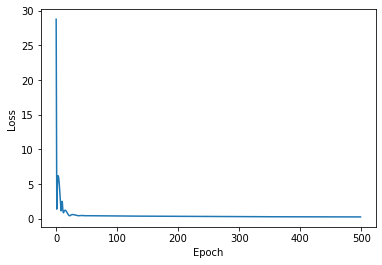

In [255]:
# plot the loss function

plt.plot(range(train_epochs), train_final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [256]:
# model dev

dev_epochs = 500
dev_final_losses = []
for i in range(dev_epochs):
    i = i+1
    y_pred = model.forward(X_test)
    loss = loss_function(y_pred, y_test)
    dev_final_losses.append(loss)

    if i%10 == 1:
        print("Epoch number: {} and the loss : {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.2812763750553131
Epoch number: 11 and the loss : 0.2565577030181885
Epoch number: 21 and the loss : 0.24746458232402802
Epoch number: 31 and the loss : 0.24176183342933655
Epoch number: 41 and the loss : 0.2354450523853302
Epoch number: 51 and the loss : 0.23211568593978882
Epoch number: 61 and the loss : 0.2288675755262375
Epoch number: 71 and the loss : 0.22669555246829987
Epoch number: 81 and the loss : 0.22569061815738678
Epoch number: 91 and the loss : 0.22447417676448822
Epoch number: 101 and the loss : 0.22368544340133667
Epoch number: 111 and the loss : 0.2233545184135437
Epoch number: 121 and the loss : 0.22365136444568634
Epoch number: 131 and the loss : 0.2227233350276947
Epoch number: 141 and the loss : 0.22242270410060883
Epoch number: 151 and the loss : 0.2225704938173294
Epoch number: 161 and the loss : 0.22131124138832092
Epoch number: 171 and the loss : 0.2214759886264801
Epoch number: 181 and the loss : 0.22094076871871948
Epoch number

Text(0.5, 0, 'Epoch')

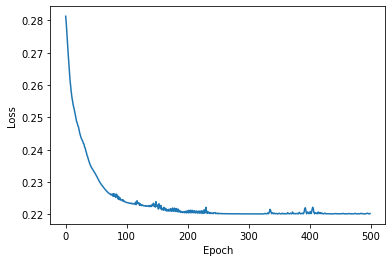

In [257]:
# plot the loss function

plt.plot(range(dev_epochs), dev_final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [258]:
#### Prediction In X_train data

train_predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_train):
        y_pred = model(data)
        train_predictions.append(y_pred.argmax().item())
        # print(y_pred.argmax().item())

In [259]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, train_predictions)
train_cm

array([[576,  78],
       [ 45, 125]])

Text(69.0, 0.5, 'Predicted Values')

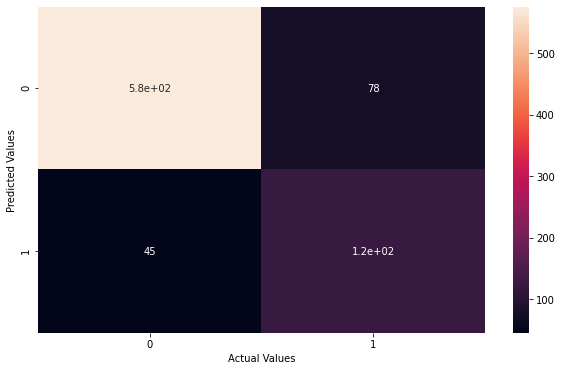

In [260]:
# train confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(train_cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [261]:
#### Prediction In X_test data

dev_predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        dev_predictions.append(y_pred.argmax().item())
        # print(y_pred.argmax().item())

In [262]:
from sklearn.metrics import confusion_matrix

dev_cm = confusion_matrix(y_test, dev_predictions)
dev_cm

array([[155,  11],
       [ 10,  30]])

Text(69.0, 0.5, 'Predicted Values')

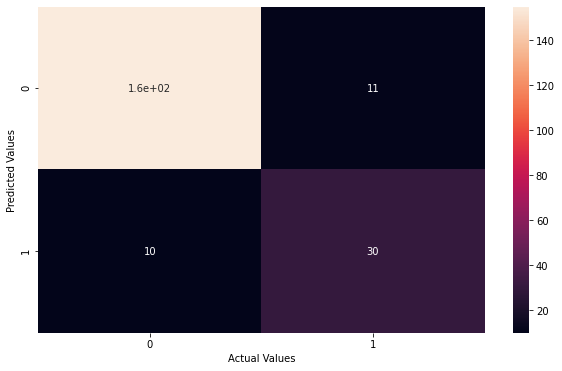

In [263]:
# dev confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(dev_cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [264]:
from sklearn.metrics import accuracy_score, log_loss

# accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train accuracy: {}".format(train_accuracy))

dev_accuracy = accuracy_score(y_test, dev_predictions)
print("Dev accuracy: {}".format(dev_accuracy))


# loss
train_loss = log_loss(y_train, train_predictions)
print("Train loss: {}".format(train_loss))

dev_loss = log_loss(y_test, dev_predictions)
print("Dev loss: {}".format(dev_loss))

Train accuracy: 0.8507281553398058
Dev accuracy: 0.8980582524271845
Train loss: 5.155742554822294
Dev loss: 3.5209859216740615
